In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name !='/device:GPU:0':
  raise SystemError("Gpu not")
print('Gpu found at {} '.format(device_name))

In [ ]:
import pickle

In [ ]:
%cd /content/gdrive/MyDrive/Master/Fall 22/DS Project/CornDataSet
!ls

/content/gdrive/MyDrive/Master/Fall 22/DS Project/CornDataSet
sample_data  Training	X_test.pickle	Y_test.pickle
Testing      VGG16logs	X_train.pickle	Y_train.pickle


In [ ]:
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

pickle_in = open("Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, GlobalAveragePooling2D,Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping
import keras.optimizers
from sklearn.metrics import classification_report
import keras.optimizers
from keras.applications import mobilenet_v2
from keras.layers import Input
import numpy as np
from keras import Model
import tensorflow as tf

In [ ]:
logs = '/content/gdrive/MyDrive/Colab Notebooks/Logs/MobileNet'

In [ ]:
tensorboard = TensorBoard(log_dir=logs , histogram_freq=0,
                          write_graph=True, write_images=False)
tensorboard_callback = tf.keras.callbacks.TensorBoard(logs, histogram_freq=1)
tb = TensorBoard(logs)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
image_size = 224
IMG_SHAPE = (image_size, image_size, 3)

base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
CLASSES = 4
x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= "adam",
              metrics=['accuracy'],
              )

In [ ]:
y = np.array(Y_train)

In [ ]:
history = model.fit(X_train, y,
                    batch_size=32,
                    epochs=10, validation_split=0.25)

Epoch 1/10
73/73 [==============================] - 503s 7s/step - loss: 0.2827 - accuracy: 0.8987 - val_loss: 12.2921 - val_accuracy: 0.5844
Epoch 2/10
73/73 [==============================] - 488s 7s/step - loss: 0.1456 - accuracy: 0.9528 - val_loss: 6.8993 - val_accuracy: 0.6091
Epoch 3/10
73/73 [==============================] - 486s 7s/step - loss: 0.1521 - accuracy: 0.9528 - val_loss: 1.4848 - val_accuracy: 0.7753
Epoch 4/10
73/73 [==============================] - 501s 7s/step - loss: 0.0793 - accuracy: 0.9706 - val_loss: 0.8420 - val_accuracy: 0.8766
Epoch 5/10
73/73 [==============================] - 477s 7s/step - loss: 0.0388 - accuracy: 0.9866 - val_loss: 1.3901 - val_accuracy: 0.8468
Epoch 6/10
73/73 [==============================] - 471s 6s/step - loss: 0.0275 - accuracy: 0.9913 - val_loss: 3.1558 - val_accuracy: 0.8377
Epoch 7/10
73/73 [==============================] - 471s 6s/step - loss: 0.0493 - accuracy: 0.9857 - val_loss: 0.9951 - val_accuracy: 0.8805
Epoch 8/10
7

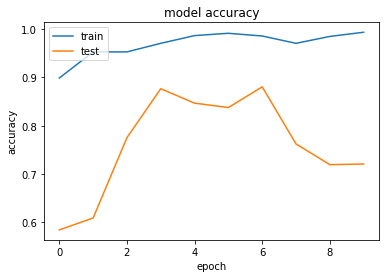

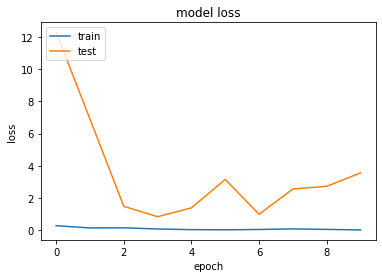

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
yt = np.array(Y_test)
scores = model.evaluate(X_test, yt, verbose=1) 
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

25/25 [==============================] - 23s 922ms/step - loss: 3.6057 - accuracy: 0.7280
Test loss: 3.6057069301605225
Test accuracy: 0.727979302406311


In [ ]:
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(Y_test, y_pred_bool))

13/13 [==============================] - 27s 2s/step
              precision    recall  f1-score   support

           0       1.00      0.56      0.72       234
           1       0.94      0.95      0.95       238
           2       0.70      0.07      0.12       103
           3       0.51      1.00      0.67       197

    accuracy                           0.73       772
   macro avg       0.79      0.65      0.62       772
weighted avg       0.82      0.73      0.70       772



In [ ]:
%cd /content/gdrive/MyDrive/Master/Fall 22/DS Project

/content/gdrive/MyDrive/Master/Fall 22/DS Project


In [ ]:
from IPython.display import Image
import cv2

In [ ]:
CATEGORIES = ["healthy","common_rust","gray_leaf_spot","northern_leaf_blight"]
def prepare(filepath):
    IMG_SIZE = 224 
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3) 

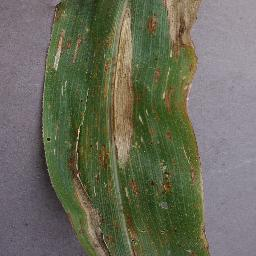

In [ ]:
Image("nlb.JPG")

In [ ]:
prediction = model.predict([prepare('nlb.JPG')])
#print(prediction)
print(CATEGORIES[int(prediction[0][0]-1)])

1/1 [==============================] - 1s 826ms/step
northern_leaf_blight
